# Jin-Seob Kim

## Research question/interests
I am interested in observing the trend of the number of rock genre tracks released annually.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt2
import seaborn as sns

# Step One: Conducting an Exploratory Data Analysis

## Raw Data

Below are the top five rows of the raw dataset I am going to use as a preview. The dataset includes data from 2008 until 2017.

In [2]:
tracks_raw = pd.read_csv("../data/raw/tracks.csv", low_memory=False)
tracks_raw.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


## Basic Observation of Raw Data

In [3]:
tracks_shape = tracks_raw.shape
print(f"The dataset has {tracks_shape[0]} rows and {tracks_shape[1]} columns.")

The dataset has 106576 rows and 53 columns.


As you can see with the data displayed above, You can think of this dataframe as being split into three levels: categories (columns), sub-categories (row 0), and the values of the sub-categories (from row 1 onwards).

In [4]:
#The dataframe.iloc[row_number] command prints each column and it's corresponding value according to the number of what row you input between the brackets. 
tracks_raw.iloc[0]

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

Displayed above are the first two 'levels' I mentioned before. 
   - First level: various columns that are grouped to specific categories of the same names
       * The groups being album, artist, set, and track


   - Second level: categories belonging to each specific column group 

### Data Visualization

In order to present some of the data in a neat and understandable fashion, I will first choose the Track ID and the amount of favorites for each track columns (sample of the data I may use for my research question)

In [5]:
tracks_favorites = (   
    tracks_raw[['Unnamed: 0','track.6']]
    .drop([0,1])
    .rename(columns = {'Unnamed: 0': "Track ID", 'track.6': "favorites"})
)
print(tracks_favorites)

tracks_favorites = tracks_favorites.iloc[0:200]
print(tracks_favorites)

       Track ID favorites
2             2         2
3             3         1
4             5         6
5            10       178
6            20         0
...         ...       ...
106571   155316         1
106572   155317         1
106573   155318         2
106574   155319         0
106575   155320         1

[106574 rows x 2 columns]
    Track ID favorites
2          2         2
3          3         1
4          5         6
5         10       178
6         20         0
..       ...       ...
197      400         1
198      401         1
199      402         1
200      403         1
201      404         2

[200 rows x 2 columns]


Above, I have taken the 'Unnamed: 0' and 'tracks.6' columns, renamed them to what they represent, and dropped the first two rows that are not consistant with the data. I will to take the first 200 rows and plot it.

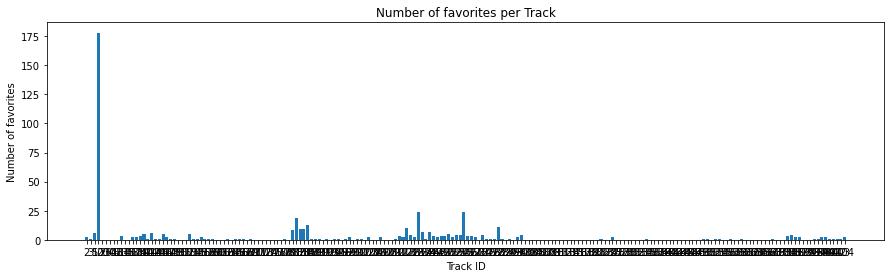

In [6]:
#First I will have to change the favorites values from strings to integers, so that they will be ordered correctly in an ascending order on the y axis.
tracks_favorites['favorites'] = tracks_favorites['favorites'].astype(int)

#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#now to plot the graph
fig= plt.figure(figsize=(15,4))
plt2.bar(tracks_favorites['Track ID'], tracks_favorites['favorites'])
plt2.title('Number of favorites per Track')
plt2.xlabel('Track ID')
plt2.ylabel('Number of favorites')
plt.show()

We are not able to differentiate between the Track IDs, however, we are can somewhat see how the general shape, with the full set of values, may look like. It seems that there are a couple of spikes here and there, along with what appears to be a single outlier. From this very superficial first look at our data visualization, I can predict that most of the data will have below 50 favorites, and very few outliers will have favorites above it. From the data table presented before the plot, I can pinpoint Track number 10 to be the outlier with 178 favorites. 
By seeing this graph, I can roughly estimate how I would like to clean up by data.

Next, I would like to look at the number of tracks released for each genre by counting how many times the genre corresponding to the row pops up in total.

In [7]:
tracks_genre = (   
    tracks_raw
    .rename(columns = {'track.7': "genre"})
    .drop([0,1])
)
tracks_genre = tracks_genre['genre']

#https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/#:~:text=The%20nunique%20%28%29%20function%20To%20count%20the%20unique,nunique%20%28%29%20function.%20The%20following%20is%20the%20syntax%3A
#Counting how many times genres is mentioned in total in the genre column
print(tracks_genre.value_counts())

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre, dtype: int64


<AxesSubplot:>

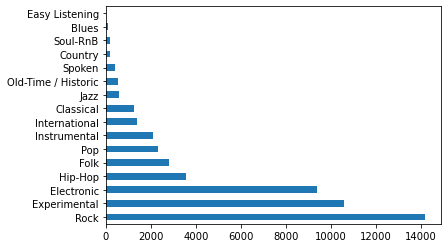

In [8]:
#https://mode.com/python-tutorial/counting-and-plotting-in-python/
tracks_genre.value_counts()[:].plot(kind='barh')

We can observe from the graph above that Rock seems to have had the most releases in total throughout the years, much contrary to my expectations of pop having the most.

Finally, I would like to see the total

In [9]:
tracks_year = (   
    tracks_raw
    .rename(columns = {'track.3': "year of release"})
    .drop([0,1])
)
tracks_year = tracks_year['year of release']

#https://stackoverflow.com/questions/42349572/remove-first-x-number-of-characters-from-each-row-in-a-column-of-a-python-datafr
#Getting rid of everything except the year it was created
tracks_year = tracks_year.str[:4]
tracks_year = tracks_year.astype(int)
print(tracks_year.value_counts())

2016    14484
2013    13876
2015    13096
2010    13057
2012    12366
2011    11459
2009    11352
2014     9770
2017     4251
2008     2863
Name: year of release, dtype: int64


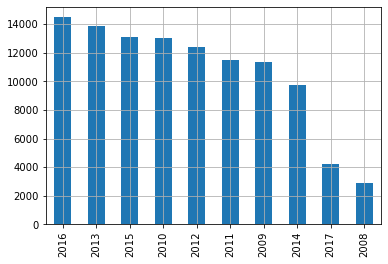

In [10]:
tracks_year.value_counts()[:].plot(kind='bar').grid(True)


2017 having the least amount of releases is not surprising. The last track released in 2017 for this dataset was released on the 30th of March. Thus, we only have one fourth of the data available for this year. The same can be said for 2008, as the first track for that year was released on the 26th of November. In fact, I find it surprising that 2008 seems to have about 2500 tracks released in basically a month, meaning that if we had the data available for all 12 months, it may have perhaps have had much more track releases than we could anticipate, compared to the other years.

# Step Two: Setting up an "Analysis Pipeline"
I will select columns I want in order to answer my research question (or columns I may find useful), process and wrangle the remaining data and then create a new csv file with it. This process will look similar to the EDA.

First, I will select the columns I need to answer my research question and drop any row that has NaN values so that each column is equally comparable in every aspect.

In [11]:
#Showing the data columns in a clear fashion to choose which ones I need easily
tracks_raw.iloc[0]

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

In [12]:
tracks_cleaned = (
    #choose the columns I need
    tracks_raw[['Unnamed: 0', 'track.3', 'track.6', 'track.7', 'track.14', 'artist.12', 'track.19']]
    
    #https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/
    #drop all rows that are not the "Rock" 'genre'
    .drop(tracks_raw.loc[(tracks_raw['track.7'] != "Rock")].index)
    
    .rename(columns = {'Unnamed: 0': "Track ID", 'track.3': "year of release", 'track.6': "favorites", 'track.7': "genre", 'track.14': "number of listens", 'artist.12': "artist name", 'track.19': "track title"})
    
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
    #drop every row with a NaN value
    .dropna()
)


tracks_cleaned

,Track ID,year of release,favorites,genre,number of listens,artist name,track title
12,135,2008-11-26 01:43:26,0,Rock,1832,Abominog,Father's Day
13,136,2008-11-26 01:43:35,0,Rock,1498,Abominog,Peel Back The Mountain Sky
27,151,2008-11-26 01:44:55,0,Rock,148,Animal Writes,Untitled 04
28,152,2008-11-26 01:44:58,0,Rock,98,Animal Writes,Untitled 11
29,153,2008-11-26 01:45:00,5,Rock,424,Arc and Sender,Hundred-Year Flood
...,...,...,...,...,...,...,...
106570,155315,2017-03-30 15:23:33,1,Rock,128,Spowder,Space Power Over-Watch Destroying Evil Rats
106571,155316,2017-03-30 15:23:34,1,Rock,102,Spowder,The Auger
106572,155317,2017-03-30 15:23:36,1,Rock,165,Spowder,Let's Skin Ruby
106573,155318,2017-03-30 15:23:37,2,Rock,168,Spowder,My House Smells Like Kim Deal/Pulp


Track ID, year of release, and genre are columns that I need for my research question at the moment. I included some other rows because I thought they may be of interest.

Next, I want to change the year of release values to only year. Furthermore, I want to change all numerical values (except Track ID, since the ID is akin to a name) into integers from strings so that it is possible to order them correctly. Last, I will restructure the columns in order most comfortable to me. I also want to get rid of 2008 and 2017 because the number of tracks released for these two years do not account for all 12 months; only partial data is present for these years.

In [13]:
tracks_cleaned['year of release'] = tracks_cleaned['year of release'].str[:4]
tracks_cleaned[['year of release', 'favorites', 'number of listens']] = tracks_cleaned[['year of release', 'favorites', 'number of listens']].astype(int)
tracks_cleaned = tracks_cleaned[['Track ID', 'genre', 'year of release', 'number of listens', 'track title', 'artist name', 'favorites']]
tracks_cleaned = tracks_cleaned.drop(tracks_cleaned.loc[(tracks_cleaned['year of release'] == 2008)].index)
tracks_cleaned = tracks_cleaned.drop(tracks_cleaned.loc[(tracks_cleaned['year of release'] == 2017)].index)
tracks_cleaned = tracks_cleaned.reset_index(drop=True)
tracks_cleaned

,Track ID,genre,year of release,number of listens,track title,artist name,favorites
0,4996,Rock,2009,1030,Hassle St.,New Bomb Turks,3
1,4997,Rock,2009,224,Interview: Part 2,New Bomb Turks,0
2,4998,Rock,2009,186,Interview: Part 3,New Bomb Turks,0
3,4999,Rock,2009,873,Grifted,New Bomb Turks,5
4,5000,Rock,2009,193,Interview: Part 4,New Bomb Turks,0
...,...,...,...,...,...,...,...
12331,148638,Rock,2016,52,Young Days,Strawberry Blonde,1
12332,148639,Rock,2016,79,Another Dream,Strawberry Blonde,1
12333,148640,Rock,2016,49,Here We Go,Strawberry Blonde,1
12334,148641,Rock,2016,59,Out of Place,Strawberry Blonde,0


# Task 3: Method Chaining and writing Python programs

In [14]:
import pandas as pd

tracks_raw = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

tracks_cleanup = (
    tracks_raw[['Unnamed: 0', 'track.3', 'track.6', 'track.7', 'track.14', 'artist.12', 'track.19']]
    .drop(tracks_raw.loc[(tracks_raw['track.7'] != "Rock")].index)
    .rename(columns = {'Unnamed: 0': "Track ID", 'track.3': "year of release", 'track.6': "favorites", 'track.7': "genre", 'track.14': "number of listens", 'artist.12': "artist name", 'track.19': "track title"})
    .dropna()
)
    

tracks_cleanup['year of release'] = tracks_cleanup['year of release'].str[:4]
tracks_cleanup[['year of release', 'favorites', 'number of listens']] = tracks_cleanup[['year of release', 'favorites', 'number of listens']].astype(int)
tracks_cleanup = tracks_cleanup.drop(tracks_cleanup.loc[(tracks_cleanup['year of release'] == 2008)].index)
tracks_cleanup = tracks_cleanup.drop(tracks_cleanup.loc[(tracks_cleanup['year of release'] == 2017)].index)
tracks_cleanup = tracks_cleanup[['Track ID', 'genre', 'year of release', 'number of listens', 'track title', 'artist name', 'favorites']]
tracks_cleanup = tracks_cleanup.reset_index(drop=True)
tracks_cleanup

,Track ID,genre,year of release,number of listens,track title,artist name,favorites
0,4996,Rock,2009,1030,Hassle St.,New Bomb Turks,3
1,4997,Rock,2009,224,Interview: Part 2,New Bomb Turks,0
2,4998,Rock,2009,186,Interview: Part 3,New Bomb Turks,0
3,4999,Rock,2009,873,Grifted,New Bomb Turks,5
4,5000,Rock,2009,193,Interview: Part 4,New Bomb Turks,0
...,...,...,...,...,...,...,...
12331,148638,Rock,2016,52,Young Days,Strawberry Blonde,1
12332,148639,Rock,2016,79,Another Dream,Strawberry Blonde,1
12333,148640,Rock,2016,49,Here We Go,Strawberry Blonde,1
12334,148641,Rock,2016,59,Out of Place,Strawberry Blonde,0


In [15]:
#Refer to project_functions2.py for more details

import pandas as pd

tracks_raw = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

def jinData(jintracks = "../data/raw/tracks.csv"):
    tracks_cleanup = (
    tracks_raw[['Unnamed: 0', 'track.3', 'track.6', 'track.7', 'track.14', 'artist.12', 'track.19']]
    .drop(tracks_raw.loc[(tracks_raw['track.7'] != "Rock")].index)
    .rename(columns = {'Unnamed: 0': "Track ID", 'track.3': "year of release", 'track.6': "favorites", 'track.7': "genre", 'track.14': "number of listens", 'artist.12': "artist name", 'track.19': "track title"})
    .dropna()
)

    
    tracks_cleanup['year of release'] = tracks_cleanup['year of release'].str[:4]
    tracks_cleanup[['year of release', 'favorites', 'number of listens']] = tracks_cleanup[['year of release', 'favorites', 'number of listens']].astype(int)
    tracks_cleanup = tracks_cleanup.drop(tracks_cleanup.loc[(tracks_cleanup['year of release'] == 2008)].index)
    tracks_cleanup = tracks_cleanup.drop(tracks_cleanup.loc[(tracks_cleanup['year of release'] == 2017)].index)
    tracks_cleanup = tracks_cleanup[['Track ID', 'genre', 'year of release', 'number of listens', 'track title', 'artist name', 'favorites']]
    tracks_cleanup = tracks_cleanup.reset_index(drop=True)
    tracks_cleanup

    return tracks_cleanup

In [16]:
tracks_cleanup.to_csv(r"../data/processed/processed_by_function2.csv")

# Task 4: Conducting analysis to help answer my research question

With the organized data available, I am able to find what I am looking for, which was observing the trend of the number of rock genre tracks released annually, with clarity. 

In [17]:
yearly_release = tracks_cleanup['year of release']
print(yearly_release.value_counts())

2012    2066
2009    2000
2011    1831
2013    1544
2010    1359
2016    1349
2015    1251
2014     936
Name: year of release, dtype: int64


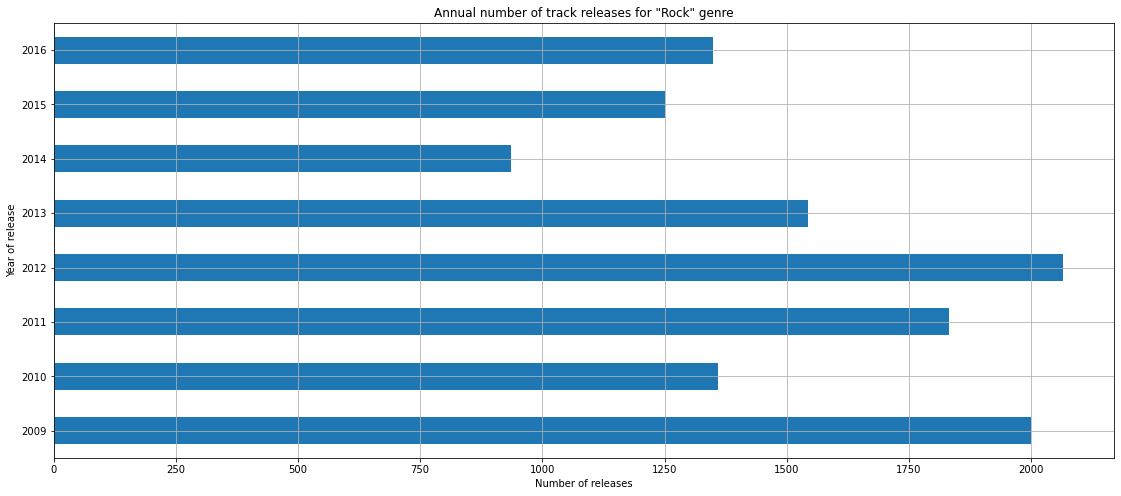

In [18]:
fig = plt.figure(figsize=(19,8))
plt.title('Annual number of track releases for "Rock" genre')
plt.xlabel("Number of releases")
plt.ylabel("Year of release")
yearly_release.value_counts().sort_index()[:].plot(kind='barh').grid(True)

It is difficult to observe a proper trend with these fluctuating release numbers on the bar chart above, but there is a noticeable drop in rock songs released from 2014 onwards, compared to the amount of releases before it. 

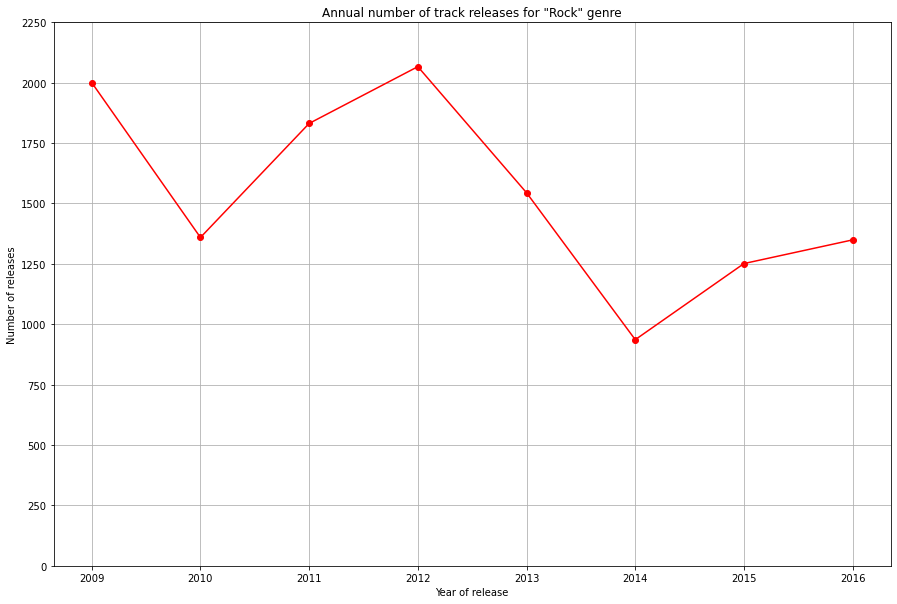

In [19]:
#https://datatofish.com/line-chart-python-matplotlib/
fig = plt.figure(figsize=(15,10))
plt.ylim(0, 2250)
plt.title('Annual number of track releases for "Rock" genre')
plt.xlabel("Year of release")
plt.ylabel("Number of releases")
yearly_release.value_counts().sort_index()[:].plot(kind='line', color='red', marker='o').grid(True)

The line graph depicts the trend more clearly. We can see how there was a significant drop in rock tracks released in 2010, but the number of tracks released was higher during 2009, 2011 and until 2012. We can see another decrease in releases from 2012 to 2014, and then a small but steady rise until 2016. After the drastic fluctuations, the curve steadies from 2014 to 2016.  

<AxesSubplot:ylabel='year of release'>

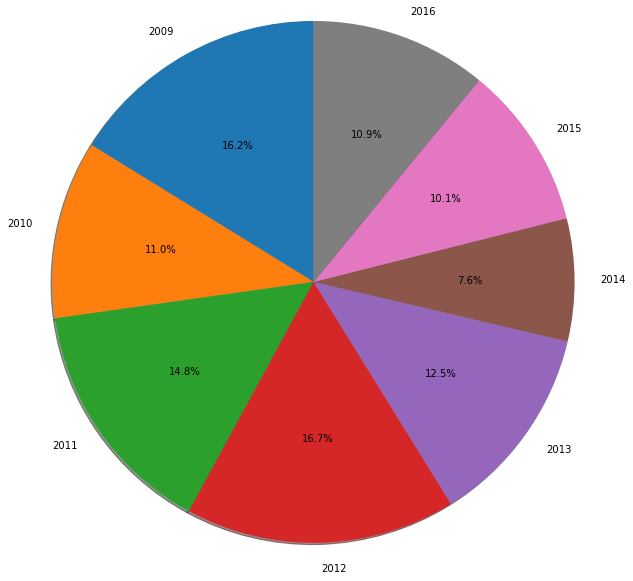

In [20]:
#https://indianaiproduction.com/matplotlib-pie-chart/
plt.axis("off")
yearly_release.value_counts().sort_index()[:].plot(kind='pie', startangle = 90, autopct='%1.1f%%', radius = 3, shadow = True)

In [21]:
100-1349/2066*100

34.70474346563408

1349 tracks in 2016 is about a 35 percent decrease from 2066, the most tracks released in 2012. However, if you look at the pie chart showing the difference in tracks released in relation to the total number of tracks released from all the years combined, the differences do not appear to be extremely large. Contrary to my expectations, the rock genre does not seem to be dying out yet.